### **Logistic Regression**

* F import 할 때 : torch.*nn*.functional -> nn 빼먹지말기

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
# 랜덤 시드(random seed) 설정 - 같은 결과 나오게하기 위함
torch.manual_seed(1)

**Model code**

* 활성화 함수 : 기본은 nn.으로! (but softmax는 F.)

In [ ]:
class LogisticRegression(nn.Module):
  def __init__(self):
    super().__init__()
    # 구현 필요
    self.linear = nn.Linear(2, 1)
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    # 구현 필요
    return self.sigmoid(self.linear(x))

**Training**

* 손실함수 : F.으로!

In [ ]:
# 구현 필요
x_train = torch.FloatTensor([[1,2],[2,3],[3,1],[4,3],[5,3],[6,2]])
y_train = torch.FloatTensor([0,0,0,1,1,1]).view(-1,1)

model = LogisticRegression()

optimizer = optim.SGD(model.parameters(), lr=1e-1)
nb_epochs = 1000
for epoch in range(nb_epochs+1):
  # 구현 필요
  prediction = model(x_train)
  cost = F.binary_cross_entropy(prediction, y_train)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch%100 == 0:
    # 100번마다 로그 출력
    # 구현 필요
    predicted_class = prediction >= torch.tensor([0.5])
    correct_prediction = predicted_class.float() == y_train
    accuracy = correct_prediction.sum().item() / len(correct_prediction)

    print('Epoch {:4d}/{} Cost: {:.6f} Accuracy: {:2.2f}%'.format(epoch, nb_epochs, cost.item(), accuracy*100))

Epoch    0/1000 Cost: 0.539713 Accuracy: 83.33%
Epoch  100/1000 Cost: 0.407688 Accuracy: 83.33%
Epoch  200/1000 Cost: 0.345649 Accuracy: 83.33%
Epoch  300/1000 Cost: 0.298323 Accuracy: 83.33%
Epoch  400/1000 Cost: 0.261179 Accuracy: 83.33%
Epoch  500/1000 Cost: 0.231633 Accuracy: 100.00%
Epoch  600/1000 Cost: 0.207779 Accuracy: 100.00%
Epoch  700/1000 Cost: 0.188230 Accuracy: 100.00%
Epoch  800/1000 Cost: 0.171976 Accuracy: 100.00%
Epoch  900/1000 Cost: 0.158282 Accuracy: 100.00%
Epoch 1000/1000 Cost: 0.146605 Accuracy: 100.00%


**Inference**

In [ ]:
# 구현 필요
test_data = torch.FloatTensor([[5,5],[1,4]])  # class1, class0
prediction = model(test_data)

print(prediction)

tensor([[0.9687],
        [0.0554]], grad_fn=<SigmoidBackward0>)


### **Softmax Regression**

**Model code**

In [ ]:
class SoftmaxRegression(nn.Module):
  def __init_(self):
    super().__init__()
    # 구현 필요
    self.linear = nn.Linear(4,3)

  def forward(self, x):
    # 구현 필요
    return self.linear(x)

**Training**

왜 오류가 뜨는지 모르겠음

In [ ]:
x_train = torch.FloatTensor([[6.3,3.3,6.0,2.5],
                             [5.8,2.7,5.1,1.9],
                             [7.1,3.0,5.9,2.1],
                             [5.1,3.5,1.4,0.2],
                             [4.9,3.0,1.4,0.2],
                             [4.7,3.2,1.3,0.2],
                             [7.0,3.2,4.7,1.4],
                             [6.4,3.2,4.5,1.5],
                             [6.9,3.1,4.9,1.5]])
# 구현 필요
y_train = torch.LongTensor([0,0,0,1,1,1,2,2,2])
# Class 0: virginica, Class 1: setosa, Class 2: versicolor

# 구현 필요
model = SoftmaxRegression()

optimizer = optim.SGD(model.parameters(), lr=1e-1)
nb_epochs = 1000
for epoch in range(nb_epochs+1):
  # 구현 필요
  prediction = model(x_train)
  cost = F.cross_entropy(prediction, y_train)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch%100 == 0:
    # 100번마다 로그 출력
    # 구현 필요
    correct_prediction = torch.argmax(prediction, 1) == y_train
    accuracy = correct_prediction.float().mean.item()

    print("Epoch {:4d}/{} Cost: {:.6f} Accuracy: {:2.2f}%".format(epoch, nb_epochs, cost.item(), accuracy*100))

ValueError: ignored

이전에 썼던 거 가져왔을 땐 됨

In [ ]:
class SoftmaxRegression(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(4, 3)

  def forward(self, x):
    return self.linear(x)

In [ ]:
x_train = torch.FloatTensor([[6.3,3.3,6.0,2.5],
                             [5.8,2.7,5.1,1.9],
                             [7.1,3.0,5.9,2.1],
                             [5.1,3.5,1.4,0.2],
                             [4.9,3.0,1.4,0.2],
                             [4.7,3.2,1.3,0.2],
                             [7.0,3.2,4.7,1.4],
                             [6.4,3.2,4.5,1.5],
                             [6.9,3.1,4.9,1.5]])
y_train = torch.LongTensor([0,0,0,1,1,1,2,2,2])

model = SoftmaxRegression()

optimizer = optim.SGD(model.parameters(), lr=1e-1)
nb_epochs = 1000
for epoch in range(nb_epochs+1):
  prediction = model(x_train)
  cost = F.cross_entropy(prediction, y_train)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch%100 == 0:
    correct_prediction = torch.argmax(prediction, 1) == y_train
    accuracy = correct_prediction.float().mean().item()
    print("Epoch {:4d}/{} Cost: {:.6f} Accuracy: {:2.2f}%".format(epoch, nb_epochs, cost.item(), accuracy*100))

Epoch    0/1000 Cost: 1.844184 Accuracy: 33.33%
Epoch  100/1000 Cost: 0.297233 Accuracy: 88.89%
Epoch  200/1000 Cost: 0.154842 Accuracy: 100.00%
Epoch  300/1000 Cost: 0.113893 Accuracy: 100.00%
Epoch  400/1000 Cost: 0.090091 Accuracy: 100.00%
Epoch  500/1000 Cost: 0.074510 Accuracy: 100.00%
Epoch  600/1000 Cost: 0.063517 Accuracy: 100.00%
Epoch  700/1000 Cost: 0.055347 Accuracy: 100.00%
Epoch  800/1000 Cost: 0.049036 Accuracy: 100.00%
Epoch  900/1000 Cost: 0.044017 Accuracy: 100.00%
Epoch 1000/1000 Cost: 0.039929 Accuracy: 100.00%


**Testing**

* F.softmax() 꼭 쓰기

In [ ]:
test_data = torch.FloatTensor([[6.3,2.9,5.6,1.8],
                               [6.5,3.0,5.8,2.2],
                               [4.6,3.1,1.5,0.2],
                               [5.0,2.3,4.0,1.3],
                               [6.5,2.8,4.6,1.5]])
# class 0, 1, 2 두개씩 포함하고 있는 테스트 데이터셋

# 구현 필요
prediction = F.softmax(model(test_data))

print(prediction)

tensor([[9.5039e-01, 2.5728e-05, 4.9581e-02],
        [9.8291e-01, 5.0869e-06, 1.7082e-02],
        [1.3205e-07, 9.7656e-01, 2.3442e-02],
        [5.7164e-01, 4.1409e-03, 4.2422e-01],
        [1.0482e-01, 4.6126e-03, 8.9057e-01]], grad_fn=<SoftmaxBackward0>)


<ipython-input-16-19f8e193982b>:9: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  prediction = F.softmax(model(test_data))


### **Softmax Regression for MNIST dataset**

**Model code**

In [ ]:
class MNIST_SoftmaxRegression(nn.Module):
  def __init__(self):
    super().__init__()
    # 구현 필요
    self.linear = nn.Linear(28*28,10)

  def forward(self, x):
    # 구현 필요
    return self.linear(x)

**Training**

In [ ]:
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import random

# hyperparameters
# 구현 필요
training_epochs = 15
batch_size = 100

# MNIST dataset
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)
mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

# dataset loader
# 구현 필요
data_loader = DataLoader(dataset=mnist_train, batch_size=batch_size, shuffle=True)

# 구현 필요
model = MNIST_SoftmaxRegression()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

print(list(model.parameters())[0].shape)
print(list(model.parameters())[1].shape)
for epoch in range(training_epochs):  # 앞서 training_epochs의 값은 15로 지정함.
  avg_cost= 0
  total_batch = len(data_loader)

  for idx, (x_train, y_train) in enumerate(data_loader):
    # 구현 필요
    print("Original:", x_train.shape)
    x_train = x_train.view(-1,28*28)
    print("Reshaped:", x_train.shape)
    prediction = model(x_train)
    print("Result:", prediction.shape)
    cost = criterion(prediction, y_train)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    avg_cost += cost / total_batch

  print('Epoch:', '%04d'%(epoch+1), 'cost=', '{:.9f}'.format(avg_cost))

print('Learning finished')

torch.Size([10, 784])
torch.Size([10])
Original: torch.Size([100, 1, 28, 28])
Reshaped: torch.Size([100, 784])
Result: torch.Size([100, 10])
Original: torch.Size([100, 1, 28, 28])
Reshaped: torch.Size([100, 784])
Result: torch.Size([100, 10])
Original: torch.Size([100, 1, 28, 28])
Reshaped: torch.Size([100, 784])
Result: torch.Size([100, 10])
Original: torch.Size([100, 1, 28, 28])
Reshaped: torch.Size([100, 784])
Result: torch.Size([100, 10])
Original: torch.Size([100, 1, 28, 28])
Reshaped: torch.Size([100, 784])
Result: torch.Size([100, 10])
Original: torch.Size([100, 1, 28, 28])
Reshaped: torch.Size([100, 784])
Result: torch.Size([100, 10])
Original: torch.Size([100, 1, 28, 28])
Reshaped: torch.Size([100, 784])
Result: torch.Size([100, 10])
Original: torch.Size([100, 1, 28, 28])
Reshaped: torch.Size([100, 784])
Result: torch.Size([100, 10])
Original: torch.Size([100, 1, 28, 28])
Reshaped: torch.Size([100, 784])
Result: torch.Size([100, 10])
Original: torch.Size([100, 1, 28, 28])
Resh

KeyboardInterrupt: ignored

**Testing**

In [ ]:
# 테스트 데이터를 사용하여 모델을 테스트한다.
with torch.no_grad():
  # 구현 필요
  x_test = mnist_test.data.view(-1,28*28).float()
  y_test = mnist_test.targets
  prediction = model(x_test)

  correct_prediction = torch.argmax(prediction, 1) == y_test
  accuracy = correct_prediction.float().mean()
  print('Accuracy:', accuracy.item())

Accuracy: 0.8840000033378601


Label:  5
Prediction:  8


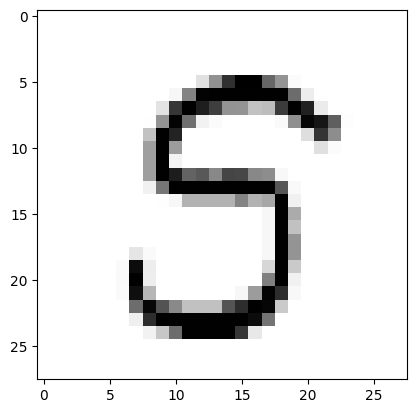

In [ ]:
with torch.no_grad():
  r = random.randint(0, len(mnist_test)-1)
  x_single_data = mnist_test.data[r:r+1].view(-1,28*28).float()
  y_single_data = mnist_test.targets[r:r+1]

  print('Label: ', y_single_data.item())
  single_prediction = model(x_single_data)
  print('Prediction: ', torch.argmax(single_prediction, 1).item())

  plt.imshow(mnist_test.data[r:r+1].view(28,28), cmap='Greys', interpolation='nearest')
  plt.show()